En este cuaderno se revisarán algunos conceptos de pandas

In [70]:
import pandas as pd
import numpy as np

archivo = pd.read_csv('penguins.csv')

# Información sobre jupyternotebooks

- El software que hace que el notebook pueda desplegar información se llama `ipython`, este es el que renderiza los ouputs de los notebooks en interfaces gráficas ambigables. 
- Depende si abren con jupyternotebook en la web o en vscode que cambia el estilo de lo que están viendo. 
- Los archivos de notebooks contienen todo lo que está en los inputs y en los outputs de su cuaderno, entonces todos los outputs también se guardan

Pueden imprimir output directamente, pero parte de lo bueno de los notebooks es que tienen la UI (interfaz de usuario)

In [71]:
print(archivo.head())

   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   1  Adelie  Torgersen            39.1           18.7              181.0   
1   2  Adelie  Torgersen            39.5           17.4              186.0   
2   3  Adelie  Torgersen            40.3           18.0              195.0   
3   4  Adelie  Torgersen             NaN            NaN                NaN   
4   5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


Un output pasa a través de ipython si lo ponen como la última línea de la celda, pero también se puede llamar explícitamente con el módulo display 

In [72]:
archivo.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [73]:
from IPython.display import display

display(archivo.head())
archivo.sample(5)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
236,237,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,female,2009
54,55,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
307,308,Chinstrap,Dream,54.2,20.8,201.0,4300.0,male,2008
30,31,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
198,199,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,female,2008


<div style='background-color:rgb(44, 162, 198); color:white; padding:10px;'>
    <h2>Notebooks les permiten poner html </h2>
    

</div>



<details>
<summary>¿Por qué se usaría head vs sample?</summary>

`head` tiene el sesgo de ver solamente las primeras filas, podría tener una estructura correcta los primeros datos y los demás no. `sample` es aleatorio, por lo que no tiene ese sesgo.
</details>

Pueden cambiar el número de rows y columns que aparecen en el display con 


In [74]:
#dimensionalidad de los datos
print(archivo.size)
print(archivo.shape)

3096
(344, 9)


Pueden incluir imágenes en sus notebooks

![pinguinos](./imgs/pinguino.png)

![pinguinos2](./imgs/pinguinoPartes.jpg)

Pueden perder memoria si dejan celdas muy grandes cuidado con eso

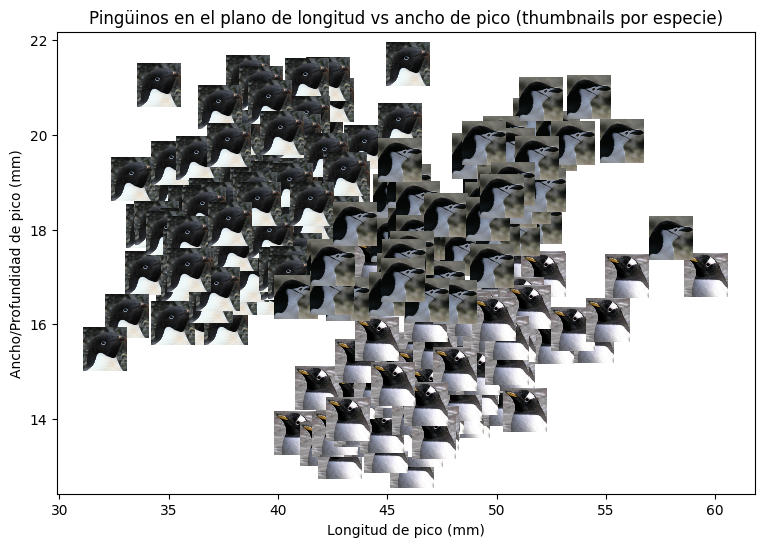

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from io import BytesIO

SPECIES_IMG_URL = {
    "Adelie": "./imgs/Adelie.png",
    "Gentoo": "./imgs/gentoo.png",
    "Chinstrap": "./imgs/chinstrap.png",
}

thumbs = {sp: np.array(Image.open(url).convert("RGBA").resize((90, 90))) for sp, url in SPECIES_IMG_URL.items()}

def scatter_penguins_with_images(
    df,
    x_col="bill_length_mm",
    y_col="bill_depth_mm",
    species_col="species",
    zoom=0.35,
    alpha_bg_points=0.15,
    jitter=0.0,
    figsize=(9, 6),
):
    """
    df: DataFrame con columnas de pico y especie.
    zoom: escala visual de las imágenes en matplotlib (más grande => más grande).
    jitter: ruido gaussiano opcional para evitar sobreposición (en unidades del eje).
    """

    d = df[[x_col, y_col, species_col]].dropna().copy()

    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(d[x_col], d[y_col], s=20, alpha=alpha_bg_points)

    rng = np.random.default_rng(0)
    for _, row in d.iterrows():
        sp = row[species_col]
        if sp not in thumbs:
            continue

        x = float(row[x_col])
        y = float(row[y_col])

        if jitter > 0:
            x += rng.normal(0, jitter)
            y += rng.normal(0, jitter)

        img = thumbs[sp]
        oi = OffsetImage(img, zoom=zoom)  
        ab = AnnotationBbox(
            oi, (x, y),
            frameon=False,  # sin marco
            box_alignment=(0.5, 0.5),
            zorder=3,
        )
        ax.add_artist(ab)

    ax.set_xlabel("Longitud de pico (mm)")
    ax.set_ylabel("Ancho/Profundidad de pico (mm)")
    ax.set_title("Pingüinos en el plano de longitud vs ancho de pico (thumbnails por especie)")

    ax.margins(0.08)

    plt.show()


scatter_penguins_with_images(archivo, zoom=0.35, jitter=0.05)


vistazo estadístico a los datos

In [76]:
archivo.describe()


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


¿Qué tipo de dato es este? ¿Cómo lo revisamos?

In [77]:
islas = archivo['island']
islas

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339        Dream
340        Dream
341        Dream
342        Dream
343        Dream
Name: island, Length: 344, dtype: object

In [78]:
var = archivo[['island', 'species']]
var

,island,species
0,Torgersen,Adelie
1,Torgersen,Adelie
2,Torgersen,Adelie
3,Torgersen,Adelie
4,Torgersen,Adelie
...,...,...
339,Dream,Chinstrap
340,Dream,Chinstrap
341,Dream,Chinstrap
342,Dream,Chinstrap


# Filtros 

con masks

In [79]:
mask_1 = (archivo["flipper_length_mm"] > 200) 
mask_2 = (archivo["sex"] == 'male')
filtro1 =  archivo[mask_1 & mask_2]
filtro1

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
91,92,Adelie,Dream,41.1,18.1,205.0,4300.0,male,2008
95,96,Adelie,Dream,40.8,18.9,208.0,4300.0,male,2008
101,102,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male,2009
123,124,Adelie,Torgersen,41.4,18.5,202.0,3875.0,male,2009
129,130,Adelie,Torgersen,44.1,18.0,210.0,4000.0,male,2009
...,...,...,...,...,...,...,...,...,...
333,334,Chinstrap,Dream,49.3,19.9,203.0,4050.0,male,2009
334,335,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
336,337,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009


Filtros con loc

In [80]:
archivo.loc[mask_1, ["flipper_length_mm",'species']] 

,flipper_length_mm,species
90,202.0,Adelie
91,205.0,Adelie
95,208.0,Adelie
101,203.0,Adelie
123,202.0,Adelie
...,...,...
334,202.0,Chinstrap
336,206.0,Chinstrap
339,207.0,Chinstrap
340,202.0,Chinstrap


Filtros con query

In [81]:
archivo.query("(flipper_length_mm > 200) & (sex=='male')")[["flipper_length_mm", "species"]]

,flipper_length_mm,species
91,205.0,Adelie
95,208.0,Adelie
101,203.0,Adelie
123,202.0,Adelie
129,210.0,Adelie
...,...,...
333,203.0,Chinstrap
334,202.0,Chinstrap
336,206.0,Chinstrap
339,207.0,Chinstrap


## Comparación de dfs

¿Por qué son diferentes los siguientes dataframes?

In [82]:
df_1 = archivo.copy()

In [83]:
(df_1 == archivo).all()

id                    True
species               True
island                True
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                  True
dtype: bool

In [84]:
df_1['bill_length_mm'][3]

np.float64(nan)

In [85]:
np.nan == np.nan

False

In [86]:
df_1.equals(archivo)

True

# Comparar dfs

In [87]:
df_1['bill_depth_mm'] = df_1['bill_depth_mm'].fillna(df_1['bill_depth_mm'].mean())
df_1.compare(archivo)

bill_depth_mm      
             self other
3        17.15117   NaN
271      17.15117   NaN

# Escribir y leer un df

Creemos una columna que contenga una lista

In [88]:
import numpy as np

df_1['lista_longitud'] = df_1.apply(lambda x: np.array([x['flipper_length_mm'], x['bill_length_mm']]), axis=1)

guardamos el archivo

Por qué estamos poniendo el index = False

In [89]:
df_1.to_csv('penguins_list.csv',index=False)

In [90]:
df_2 = pd.read_csv('penguins_list.csv')

In [91]:
df_2['lista_longitud'].equals(df_1['lista_longitud'])

False

Los archivos csv no tienen ningún tipo de estructura. }

Un archivo que si tiene esa estructura y es mucho más ligero es `.parquet`



| Aspecto                 | CSV                    | Parquet                 |
| ----------------------- | ---------------------- | ----------------------- |
| Tipo de datos             | Caracteres                  | Binarios                |
| Orientación             | Filas                  | Columnas                |
| Legible por humanos     | Sí                     | No                      |
| Preserva tipos          | ❌                      | ✅                       |
| Eficiencia en analítica | Baja                   | Muy alta                |
| Tamaño de archivo       | Grande                 | Pequeño                 |
| Escalabilidad           | Mala                   | Excelente               |
| Uso típico              | Intercambio, enseñanza | Analítica, ML, big data |


In [92]:
df_1.to_parquet('penguins_list.parquet',index=False)

In [93]:
df_2_parquet = pd.read_parquet('penguins_list.parquet')

In [94]:
df_2_parquet.equals(df_1)

True

Este tipo de conversiones pasa entre bases de datos y python/pyspark como se puede ver en el siguiente [notebook en databricks](https://dbc-c5f42569-8d7e.cloud.databricks.com/editor/notebooks/184971435676541?o=7474649205973794)

# Más manipulaciones

In [95]:
archivo['bill_length_mm'] = archivo['bill_length_mm'].fillna(archivo['bill_length_mm'].mean())
archivo['sex'] = archivo['sex'].fillna(archivo['sex'].mode()[0])

In [96]:
archivo.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.50000,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.30000,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,43.92193,NaN,NaN,NaN,male,2007
4,5,Adelie,Torgersen,36.70000,19.3,193.0,3450.0,female,2007


drop quita registros por índice o columna depende del argumento axis, por defecto quita rows

In [97]:
archivo_1 = archivo.drop(2)
archivo_1 = archivo_1.drop([0, 1, 3])

In [98]:
archivo_1

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [99]:
# Eliminar filas con valores nulos en cualquier columna
archivo = archivo.dropna()

# Eliminar filas con valores nulos solo en columnas específicas
archivo = archivo.dropna(subset=['sex', 'island'])

In [100]:
#crear columnas nuevas
archivo["body_mass_en_kg"] = archivo["body_mass_g"] / 1000
archivo['gordito'] = np.where(archivo['body_mass_g'] > 4000, '1', '0')


dummies = pd.get_dummies(archivo['island'])

dummies

,Biscoe,Dream,Torgersen
0,False,False,True
1,False,False,True
2,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


Por qué podría ser malo para un modelo lineal tener una expresión como la de arriba?

In [111]:
import numpy as np

X = pd.get_dummies(archivo["island"])
X_int = np.column_stack([np.ones(len(X)), X])
np.linalg.matrix_rank(X_int)

np.int64(3)

In [112]:
archivo = pd.concat([
    archivo.drop("island", axis = 1),
    dummies
], axis = 1)
archivo.head()

,id,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_en_kg,gordito,Biscoe,Dream,Torgersen
0,1,Adelie,39.1,18.7,181.0,3750.0,male,2007,3.75,0,False,False,True
1,2,Adelie,39.5,17.4,186.0,3800.0,female,2007,3.80,0,False,False,True
2,3,Adelie,40.3,18.0,195.0,3250.0,female,2007,3.25,0,False,False,True
4,5,Adelie,36.7,19.3,193.0,3450.0,female,2007,3.45,0,False,False,True
5,6,Adelie,39.3,20.6,190.0,3650.0,male,2007,3.65,0,False,False,True
